In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score


In [1]:
import pandas as pd
car_data = pd.read_csv('carData.csv')
print(car_data.head())


  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [7]:
data = pd.read_csv('carData.csv')

In [8]:
print(data.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [9]:
label_encoder = LabelEncoder()
data['Fuel_Type'] = label_encoder.fit_transform(data['Fuel_Type'])
data['Seller_Type'] = label_encoder.fit_transform(data['Seller_Type'])
data['Transmission'] = label_encoder.fit_transform(data['Transmission'])

In [10]:
X = data[['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
y = data['Selling_Price']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
predictions = model.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 3.5289272538943877
R^2 Score: 0.8468053957655803


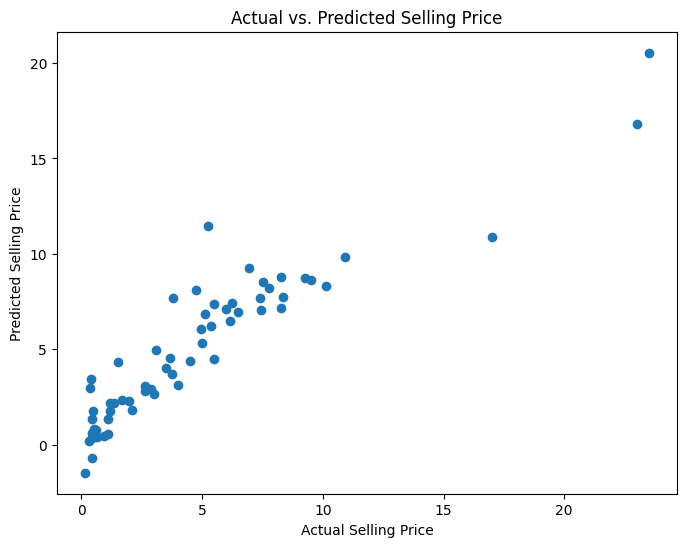

In [16]:
import matplotlib.pyplot as plt
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Price')
plt.show()

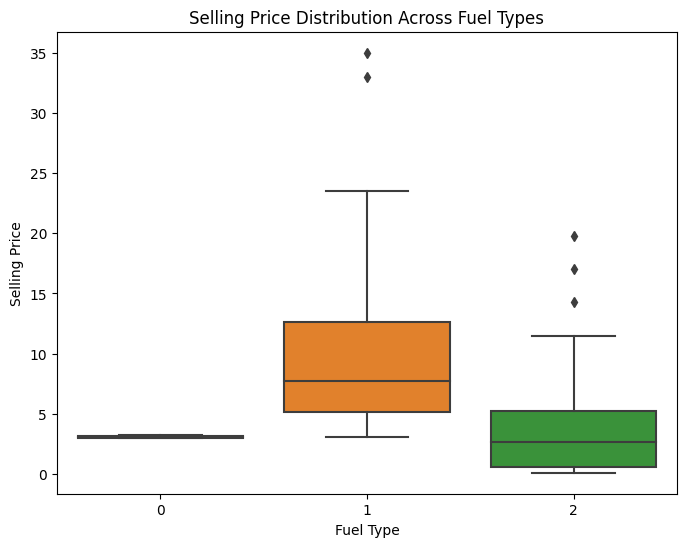

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=data)
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.title('Selling Price Distribution Across Fuel Types')
plt.show()


In [19]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Random Forest Mean Squared Error: {rf_mse}")
print(f"Random Forest R^2 Score: {rf_r2}")

Random Forest Mean Squared Error: 0.8823054824590156
Random Forest R^2 Score: 0.9616981508899042


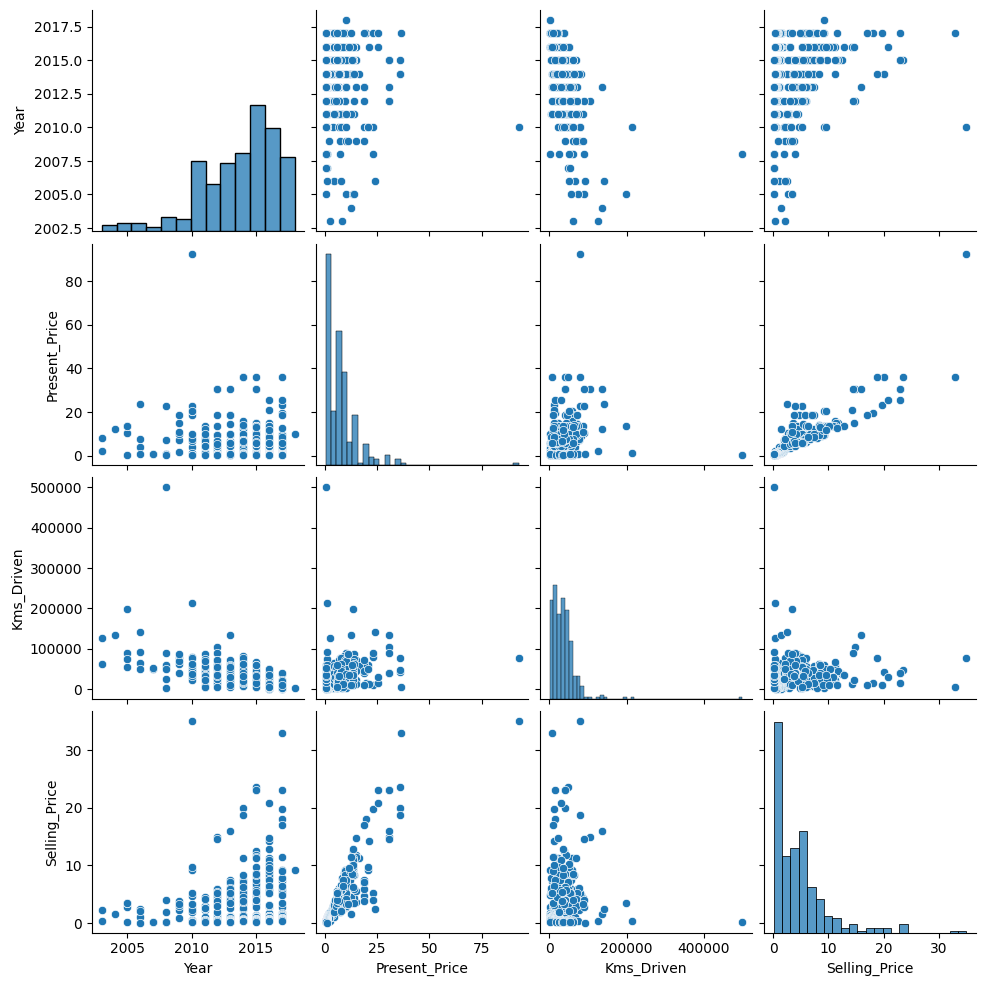

In [20]:
import seaborn as sns
sns.pairplot(data, vars=['Year', 'Present_Price', 'Kms_Driven', 'Selling_Price'])
plt.show()


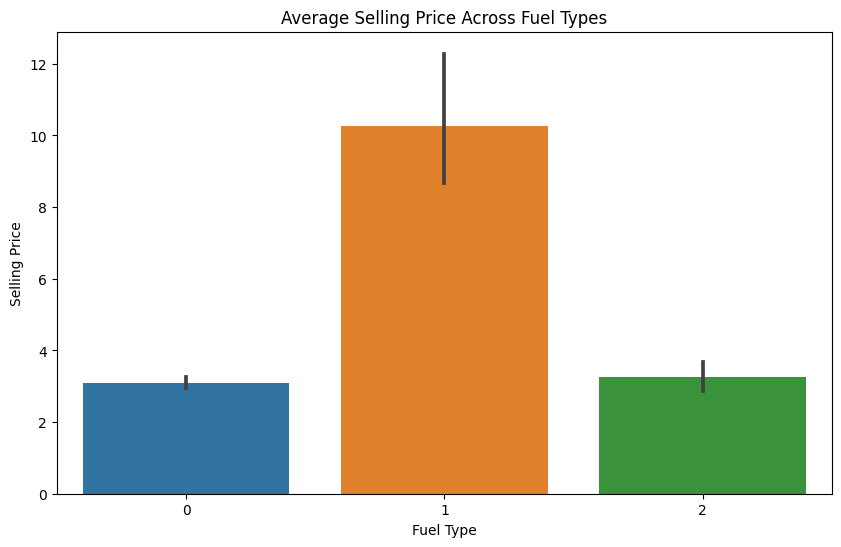

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Fuel_Type', y='Selling_Price', data=data)
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.title('Average Selling Price Across Fuel Types')
plt.show()

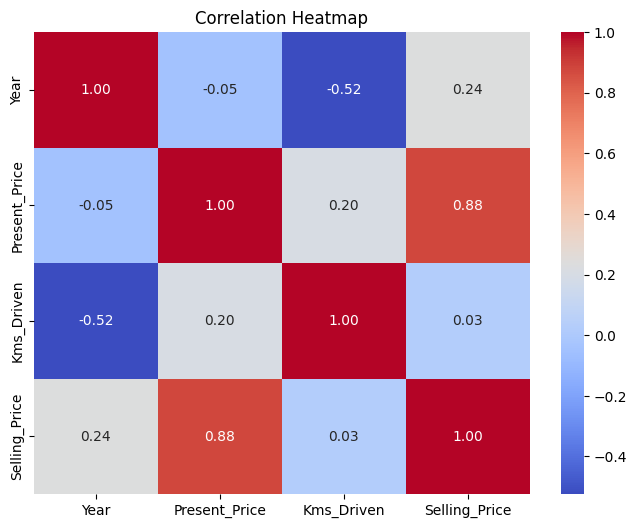

In [22]:
corr_matrix = data[['Year', 'Present_Price', 'Kms_Driven', 'Selling_Price']].corr()
# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


**The end**